<h1 style="color:#069">Data Analysis - Description</h1>

The goal of this data analysis is to gain insights from the Corona data base of the John Hopkins universety (JH).
These insights will help me write the functions for the datamanager.py of the CoronaBot.

To be exact, these are the Questions I need to answer: 

- [ ] How is the data organized?
- [ ] Where is the data that I need? 
- [ ] How should I organize the data infrastructure for the data manager?

<h2 style="color:#777">Functions</h2>

- [ ] **update_data()**

> Get the data needed from JH 


- [ ]  **per_population()** 

> Receives a list of countries to compare
> Return plot of category "dead", "cured", "infected" or "active"
> (absolute value of category)/100.000 (x-Axis: dates)


- [ ] **since_outbreak()**

> Receives a list of countries to compare
> Return plot of category "dead", "cured", "infected" or "active"
> (absolute value of category)/100.000 from the day of the 100th case (x-Axis: days)


- [ ] **compare_deaths()**

> Receives a list of countries to compare
> Returns list of piechart diagrams that show:
> > Total Corona deaths vs all other deaths, since the frst Corona Cases
> Assumptions:
> > * an average amount of people died since the first corona cases
> > * all people that are listed under corona-deaths would not have died otherwise
> Conclusion: Total amount of deaths since the first corona cases is the average amount of deaths + the deaths from corona

<h2 style="color:#777">Further Questions</h2>

- [ ] How do I send the mathplot output to a another function?


<h1 style="color:#069">Explore the Data</h1>

In this "Exploring the Data" part I am getting an overview over the data set.

In [1]:
#%matplotlib inline
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # For pie chart
import seaborn as seb
#import missingno as msno
from IPython.display import Markdown, display, Image
import os
from pathlib import Path
import pickle
#from wordcloud import WordCloud 
import re

<h2 style="color:#777">Check out the File Structure</h2>

In [2]:
!pwd

/home/deb/Documents/Programmes/CoronaBotRepos/CoronaBot/DataAnalysis


In [3]:
#Files in the Hopkkins Folder:
os.listdir("../../JohnHopkins/csse_covid_19_data/")

['UID_ISO_FIPS_LookUp_Table.csv',
 'README.md',
 'csse_covid_19_time_series',
 'csse_covid_19_daily_reports']

In [4]:
#Defining my general data folder path
hop = Path("/home/deb/Documents/Programmes/CoronaBotRepos/JohnHopkins/csse_covid_19_data")

In [5]:

LookUp = pd.read_csv(hop/'UID_ISO_FIPS_LookUp_Table.csv')

In [6]:
Lookup = pd.DataFrame(LookUp)

In [7]:
LookUp

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.202700,17.873900,Angola,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3566,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
3567,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
3568,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
3569,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


That is just the file that contains the coordinates fo the countries and provinces. 

**Checkout the time series (ts) files**

In [8]:
#defining path to the time series
time_ser_path = Path("/home/deb/Documents/Programmes/CoronaBotRepos/JohnHopkins/csse_covid_19_data/csse_covid_19_time_series/")

In [9]:
ts_csvs = os.listdir(time_ser_path)
ts_csvs

['README.md',
 '.gitignore',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_deaths_US.csv',
 'time_series_covid19_recovered_global.csv',
 'time_series_covid19_confirmed_global.csv',
 'time_series_covid19_confirmed_US.csv']

**README**

In [10]:
Readme = hop/time_ser_path/"README.md"

In [11]:
with open(Readme, "r") as f:
    read=f.read()
    
print(read)

[Upcoming changes in time series tables (3/22)](https://github.com/CSSEGISandData/COVID-19/issues/1250)

Note: some records may look incomplete or inconsistent with previous days due to the modification from the data source.

<b>---DEPRICATED WARNING---</b><br>
The files below will no longer be updated. With the release of the new data structure, we are updating our time series tables to reflect these changes. Please reference time_series_covid19_confirmed_global.csv and time_series_covid19_deaths_global.csv for the latest time series data. <br><br>
time_series_19-covid-Confirmed.csv	<br>
time_series_19-covid-Deaths.csv	<br>
time_series_19-covid-Recovered.csv



Oh okay, so the last data of this file is the most recent, It won't be updated anymore...

**deaths_global**

In [23]:
df_deaths_global = pd.DataFrame(pd.read_csv(hop/"csse_covid_19_time_series"/ts_csvs[2]))

In [24]:
df_deaths_global

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,NaN,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,...,4,4,6,6,7,7,11,14,14,15
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,15,15,16,17,20,20,21,22,22,23
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,44,58,86,105,130,152,173,193,205,235
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12,14,15,16,17,18,21,22,23,25
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_deaths_global["Country/Region"].value_counts()

China             33
Canada            15
France            11
United Kingdom    11
Australia          8
                  ..
Bahamas            1
Angola             1
Israel             1
Croatia            1
Sudan              1
Name: Country/Region, Length: 184, dtype: int64

**TO DO:**

- [x] drop the coordinates
- [x] drop the province/state
- [x] combine all rows with the same name 
- [ ] plot timeseries of one or two rows 
- [ ] try to send the plot to a function

In [26]:
df = df_deaths_global.drop(['Province/State', 'Lat', 'Long'], axis=1) 

In [30]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,4,4,6,6,7,7,11,14,14,15
1,Albania,0,0,0,0,0,0,0,0,0,...,15,15,16,17,20,20,21,22,22,23
2,Algeria,0,0,0,0,0,0,0,0,0,...,44,58,86,105,130,152,173,193,205,235
3,Andorra,0,0,0,0,0,0,0,0,0,...,12,14,15,16,17,18,21,22,23,25
4,Angola,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,United Kingdom,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,France,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,South Sudan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,Western Sahara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df1=df.groupby(df.index).sum()
df1

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,0,0,0,0,0,0,0,0,0,0,...,4,4,6,6,7,7,11,14,14,15
1,0,0,0,0,0,0,0,0,0,0,...,15,15,16,17,20,20,21,22,22,23
2,0,0,0,0,0,0,0,0,0,0,...,44,58,86,105,130,152,173,193,205,235
3,0,0,0,0,0,0,0,0,0,0,...,12,14,15,16,17,18,21,22,23,25
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df2=df.reset_index().groupby("Country/Region").sum()
df2

,index,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,4,4,6,6,7,7,11,14,14,15
Albania,1,0,0,0,0,0,0,0,0,0,...,15,15,16,17,20,20,21,22,22,23
Algeria,2,0,0,0,0,0,0,0,0,0,...,44,58,86,105,130,152,173,193,205,235
Andorra,3,0,0,0,0,0,0,0,0,0,...,12,14,15,16,17,18,21,22,23,25
Angola,4,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,228,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
West Bank and Gaza,241,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Western Sahara,261,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df2=df2.drop(['index'], axis=1)
df2


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,4,4,6,6,7,7,11,14,14,15
Albania,0,0,0,0,0,0,0,0,0,0,...,15,15,16,17,20,20,21,22,22,23
Algeria,0,0,0,0,0,0,0,0,0,0,...,44,58,86,105,130,152,173,193,205,235
Andorra,0,0,0,0,0,0,0,0,0,0,...,12,14,15,16,17,18,21,22,23,25
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df2.loc['Afghanistan']

1/22/20     0
1/23/20     0
1/24/20     0
1/25/20     0
1/26/20     0
           ..
4/5/20      7
4/6/20     11
4/7/20     14
4/8/20     14
4/9/20     15
Name: Afghanistan, Length: 79, dtype: int64

In [ ]:


In [2]: ts = Series(randn(1000), index=date_range('1/1/2000', periods=1000))

In [3]: ts = ts.cumsum()

In [4]: ts.plot()
    
    
    
    
In [6]: df = DataFrame(randn(1000, 4), index=ts.index, columns=list('ABCD'))

In [7]: df = df.cumsum()

In [8]: plt.figure(); df.plot(); plt.legend(loc='best')
Out[8]: <matplotlib.legend.Legend at 0x12f2b590>

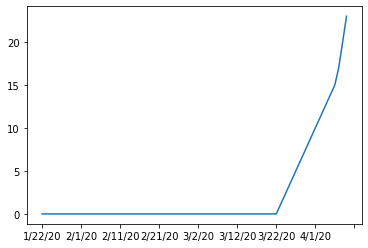

In [70]:
ts = df2.loc['Zimbabwe']
ts = ts.cumsum()
ts.plot()

In [73]:
df = df2.loc[['Vietnam', 'West Bank and Gaza', 'Zambia']]

In [74]:
df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Zambia,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1


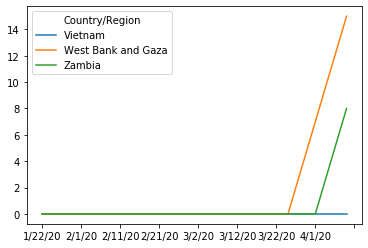

In [76]:
ts = df.T
ts = ts.cumsum()
ts.plot()

In [88]:
df.T

Country/Region,Vietnam,West Bank and Gaza,Zambia
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
4/5/20,0,1,1
4/6/20,0,1,1
4/7/20,0,1,1
4/8/20,0,1,1


In [97]:
df3=df.T.reset_index()
df3

Country/Region,index,Vietnam,West Bank and Gaza,Zambia
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
...,...,...,...,...
74,4/5/20,0,1,1
75,4/6/20,0,1,1
76,4/7/20,0,1,1
77,4/8/20,0,1,1


In [90]:
df4=df3.drop(['Country/Region'], axis=1)
df4

KeyError: "['Country/Region'] not found in axis"

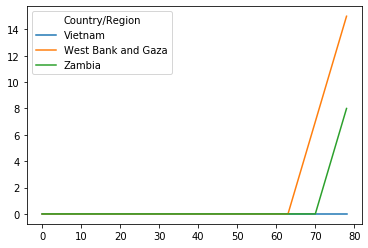

In [98]:
ts = df3
ts = ts.cumsum()

ts.plot()